# Assignment 2

Research Goal: Predict whether a person will accept a coupon to a hospitality business given the survey data of Wang et al. 2017. 

Hypothesis is that lower paid workers heading to a bar in the evening will be the most likely to take a coupon. 

[dataset](https://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation)

### Dataset Feature Notes

- destination: No Urgent Place, Home, Work
- passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
- weather: Sunny, Rainy, Snowy
- temperature:55, 80, 30
- time: 2PM, 10AM, 6PM, 7AM, 10PM
- coupon: Restaurant (less than \\$20), Coffee House, Carry out & Take away, Bar, Restaurant (between \\$20-\\$50)
- expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
- gender: Female, Male
- age: 21, 46, 26, 31, 41, 50plus, 36, below21
- maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
- has_Children:1, 0
- education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree - (Masters or Doctorate), Some High School
- occupation: Unemployed, Architecture & Engineering, Student, Education&Training & Library, Healthcare Support, Healthcare Practitioners & Technical, Sales & Related, Management, Arts Design Entertainment Sports & Media, Computer & Mathematical, Life Physical Social Science, Personal Care & Service, Community & Social Services, Office & Administrative Support, Construction & Extraction, Legal, Retired, Installation Maintenance & Repair, Transportation & Material Moving, Business & Financial, Protective Service, Food Preparation & Serving Related, Production Occupations, Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
- income: \\$37500 - \\$49999, \\$62500 - \\$74999, \\$12500 - \\$24999, \\$75000 - \\$87499,
\\$50000 - \\$62499, \\$25000 - \\$37499, \\$100000 or More, \\$87500 - \\$99999, Less than \\$12500
- Bar: never, less1, 1-3, gt8, 4-8, nan (feature meaning: how many times do you go to a bar every month?)
- CoffeeHouse: never, less1, 4-8, 1-3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
- CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
- RestaurantLessThan20: 4-8, 1-3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than \\$20 every month?)
- Restaurant20To50: 1-3, less1, never, gt8, 4-8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of \\$20 - \\$50 every month?)
- toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
- toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
- direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
- Y:1, 0 (whether the coupon is accepted)

In [1]:
# Import Modules

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from collections import defaultdict

# 1. Retrieve the Data

In [2]:
# Load the dataset

survey = pd.read_csv('in-vehicle-coupon-recommendation.csv')
survey.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


# 2. Check & Clean the Data

## 2.1 Check the Dataset

### 2.1.1 Shape of Dataset

In [3]:
print("Dataset shape: " + str(survey.shape) + "\n")

Dataset shape: (12684, 26)



### 2.1.2 Data Types

Notice the Car column has significantly less values

In [4]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
destination             12684 non-null object
passanger               12684 non-null object
weather                 12684 non-null object
temperature             12684 non-null int64
time                    12684 non-null object
coupon                  12684 non-null object
expiration              12684 non-null object
gender                  12684 non-null object
age                     12684 non-null object
maritalStatus           12684 non-null object
has_children            12684 non-null int64
education               12684 non-null object
occupation              12684 non-null object
income                  12684 non-null object
car                     108 non-null object
Bar                     12577 non-null object
CoffeeHouse             12467 non-null object
CarryAway               12533 non-null object
RestaurantLessThan20    12554 non-null object
Restaurant20To50     

### 2.1.3 Numerical Description

- **Weather:** is provided in Fahrenheight and will need to be converted. 

In [5]:
survey.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


### 2.1.4 Categorical Description
- **Destination:** Half the surveys respondents responded with *No Urgent Place*. Will need to ensure data isn't biased
- **Passanger:** Over half the surveys respondents responded with *Alone*. Will need to ensure data isn't biased, however, for this scenario as it's a one to one interaction the passenger feature may actually not be required. 
- **Weather:** - Over two thirds of the respondents responded with *Sunny*. Likely in a live scenario the coupons would be handed out in Sunny weather. Will need to ensure data isn't biased. 
- **Car:** Has many null values. Will need to investigate featutre further
- **Bar:** Has mising values that will need to be handled. 
- **CoffeeHouse:** Has mising values that will need to be handled. 
- **CarryAway:** Has mising values that will need to be handled. 
- **RestaurantLessThan20:** Has mising values that will need to be handled. 
- **Restaurant20To50:** Has mising values that will need to be handled. 

In [6]:
survey.describe(include="O")

,destination,passanger,weather,time,coupon,expiration,gender,age,maritalStatus,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,12684,108,12577,12467,12533,12554,12495
unique,3,4,3,5,5,2,2,8,5,6,25,9,5,5,5,5,5,5
top,No Urgent Place,Alone,Sunny,6PM,Coffee House,1d,Female,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,do not drive,never,less1,1~3,1~3,less1
freq,6283,7305,10069,3230,3996,7091,6511,2653,5100,4351,1870,2013,22,5197,3385,4672,5376,6077


## 2.2 Clean the Dataset

### 2.2.1 Correct Feature Names

In [7]:
# Fix Passenger Typo
survey.rename(columns={"passanger": "passenger"}, inplace=True)

# Update Features to follow Camel Case
survey.rename(columns={"has_children":"hasChildren",
                       "toCoupon_GEQ5min": "toCouponGEQ5min",
                       "toCoupon_GEQ15min":"toCouponGEQ15min",
                       "toCoupon_GEQ25min":"toCouponGEQ25min",
                       "direction_same":"directionSame",
                       "direction_opp":"directionOpp"}, 
              inplace=True)

# Change first character of each feature to lowercase to ensure consistent Camelcase across all features
for feature in survey:
    formatted_feature_title = feature[0].lower() + feature[1:]
    survey.rename(columns={feature: formatted_feature_title}, inplace=True)

### 2.2.2 Correct Feature Data Types

Investigating the data of each feature using ```value_counts()``` revealed that there are no numerical features in the dataset. All the expected numerical features such as age or temperature were found to be ordinal data as there were only a few distinct values present in the dataset. 

> **For Example**
Temperature (F) only has three distinct values: 30, 55 & 80

In [8]:
survey["temperature"].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

As result all the features had their datatype changed to reflect whether they were an Ordinal or Nominal feature

In [9]:
# Nominal Features
survey = survey.astype({"destination": "category", "passenger": "category", 
                        "weather": "category", "coupon":"category",
                        "gender":"category", "maritalStatus":"category",
                        "occupation":"category", "hasChildren":"category",
                        "toCouponGEQ5min":"category", "toCouponGEQ15min":"category",
                        "toCouponGEQ25min":"category", "directionSame":"category",
                        "directionOpp":"category", "y":"category", "car":"category"})

# Ordinal Features

# Function to simplify the setting of categories for each column
def set_ordinal_dtype(dataset, feature, categories):
    dataset[feature] = pd.Categorical(dataset[feature], ordered=True, categories=categories)
    
set_ordinal_dtype(survey, 'expiration', ["2h","1d"])
set_ordinal_dtype(survey, 'temperature', [30,55,80])
set_ordinal_dtype(survey, 'time', ["7AM", "10AM", "2PM", "6PM", "10PM"])
set_ordinal_dtype(survey, 'bar', ["never","less1","1~3","4~8","gt8"])
set_ordinal_dtype(survey, 'coffeeHouse', ["never","less1","1~3","4~8","gt8"])
set_ordinal_dtype(survey, 'carryAway', ["never","less1","1~3","4~8","gt8"])
set_ordinal_dtype(survey, 'restaurantLessThan20', ["never","less1","1~3","4~8","gt8"])
set_ordinal_dtype(survey, 'restaurant20To50', ["never","less1","1~3","4~8","gt8"])
set_ordinal_dtype(survey, 'age', ["below21", "21", "26", "31", "36", "41", "46", "50plus"])
set_ordinal_dtype(survey, 'income', ["Less than $12500", "$12500 - $24999", "$25000 - $37499", 
                                     "$37500 - $49999", "$50000 - $62499", "$62500 - $74999", 
                                     "$75000 - $87499", "$87500 - $99999", "$100000 or More"])
set_ordinal_dtype(survey, 'education', ["Some High School","High School Graduate",
                                         "Some college - no degree","Associates degree",
                                         "Bachelors degree","Graduate degree (Masters or Doctorate)"])

### 2.2.3 Correct White Space, Typos & Incorrect Case

This dataset was pulled from the UCI Machine Learning Repository. It was expected that the data would already be clean however, a quick check was made to be sure. As expected the data was already cleaned for white space, typos and incorrect case.

### 2.2.4 Handle Missing Values

The *Car* feature has a significant amount of missing values. Investigating the feature further with ```value_counts()``` reveals that the data present isn't very useful either. As such, the entire feature will be dropped. 

*Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 & Restaurant20To50* all had missing values. It was found that there was no correlation to other features when each respective column had a missing value. Furthermore, there was overlap between the features to when missing values occurred. As such, all the records with missing values for each of these features have been removed as there is minimal data loss doing so.

In [10]:
survey.isnull().sum()

destination                 0
passenger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
hasChildren                 0
education                   0
occupation                  0
income                      0
car                     12576
bar                       107
coffeeHouse               217
carryAway                 151
restaurantLessThan20      130
restaurant20To50          189
toCouponGEQ5min             0
toCouponGEQ15min            0
toCouponGEQ25min            0
directionSame               0
directionOpp                0
y                           0
dtype: int64

In [11]:
# drop entire car feature
survey.drop(columns="car", axis=0, inplace=True)

# remove all null values
survey.dropna(inplace=True)

## 3. Data Exploration
### 3.1 Univariate Exploration
#### 3.1.1 Time

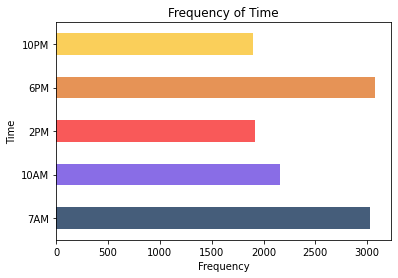

In [12]:
# Get Value Vounts of Time and Plot as Horizontal Bar Chart
survey['time'].value_counts().sort_index().plot.barh(color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])

# Style the plot
plt.title("Frequency of Time")
plt.ylabel("Time")
plt.xlabel("Frequency")
plt.show()

#### 3.1.2 Gender

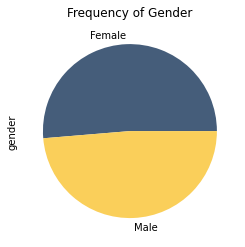

In [13]:
survey['gender'].value_counts().plot.pie(colors=["#455D7A","#FACF5A"])
plt.title("Frequency of Gender")
plt.show()

#### 3.1.3 Income

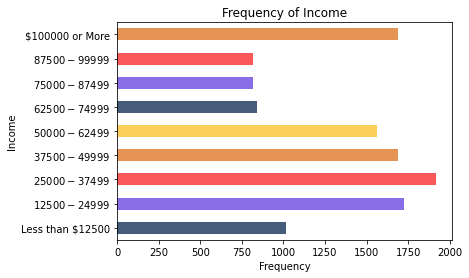

In [14]:
survey['income'].value_counts().sort_index().plot.barh(color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])
plt.title("Frequency of Income")
plt.ylabel("Income")
plt.xlabel("Frequency")
plt.show()

#### 3.1.4 Destination

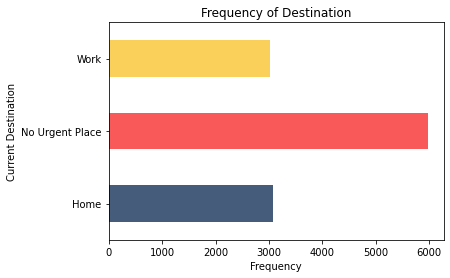

In [15]:
survey['destination'].value_counts().sort_index().plot.barh(color=["#455D7A","#F95959","#FACF5A"])
plt.title("Frequency of Destination")
plt.ylabel("Current Destination")
plt.xlabel("Frequency")
plt.show()

#### 3.1.5 Weather

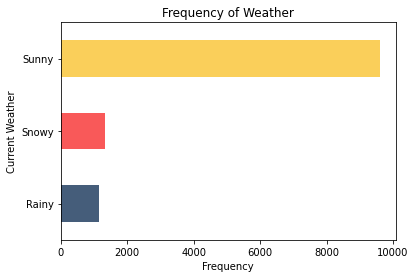

In [16]:
survey['weather'].value_counts().sort_index().plot.barh(color=["#455D7A","#F95959","#FACF5A"])
plt.title("Frequency of Weather")
plt.ylabel("Current Weather")
plt.xlabel("Frequency")
plt.show()

#### 3.1.6 Coupon

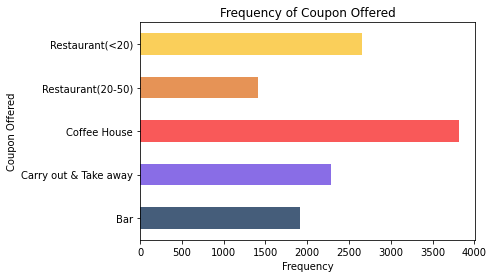

In [17]:
survey['coupon'].value_counts().sort_index().plot.barh(color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])
plt.title("Frequency of Coupon Offered")
plt.ylabel("Coupon Offered")
plt.xlabel("Frequency")
plt.show()

#### 3.1.7 Bar

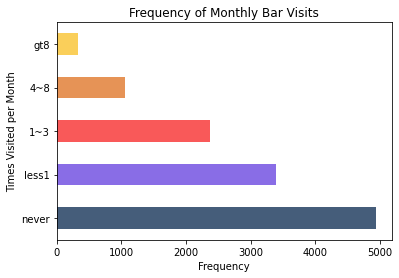

In [18]:
survey['bar'].value_counts().sort_index().plot.barh(color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])
plt.title("Frequency of Monthly Bar Visits")
plt.ylabel("Times Visited per Month")
plt.xlabel("Frequency")
plt.show()

#### 3.1.8 Coffee House

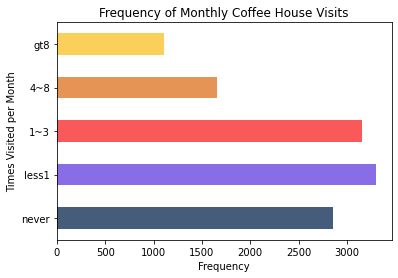

In [19]:
survey['coffeeHouse'].value_counts().sort_index().plot.barh(color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])
plt.title("Frequency of Monthly Coffee House Visits")
plt.ylabel("Times Visited per Month")
plt.xlabel("Frequency")
plt.show()

#### 3.1.9 Coupon Acceptance

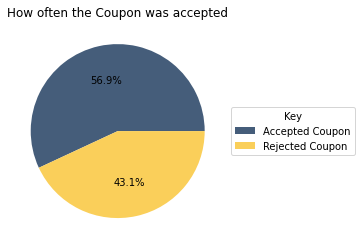

In [20]:
# Get total number of records
total = survey['y'].value_counts().sum()
# Get the percentage of each 
convert_to_perc = lambda x: round((x/total) * 100, 2)
coupon_accept_rate = survey['y'].value_counts().apply(convert_to_perc)
# Plot Pie - Remove Labels for cleaner chart
coupon_accept_rate.plot.pie(labels=["",""], 
                            autopct='%1.1f%%',
                            colors=["#455D7A","#FACF5A"])
plt.title("How often the Coupon was accepted")
plt.ylabel("")
# Add Legend
plt.legend(labels=["Accepted Coupon","Rejected Coupon"], 
           title="Key", 
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 3.1.10 Occupation

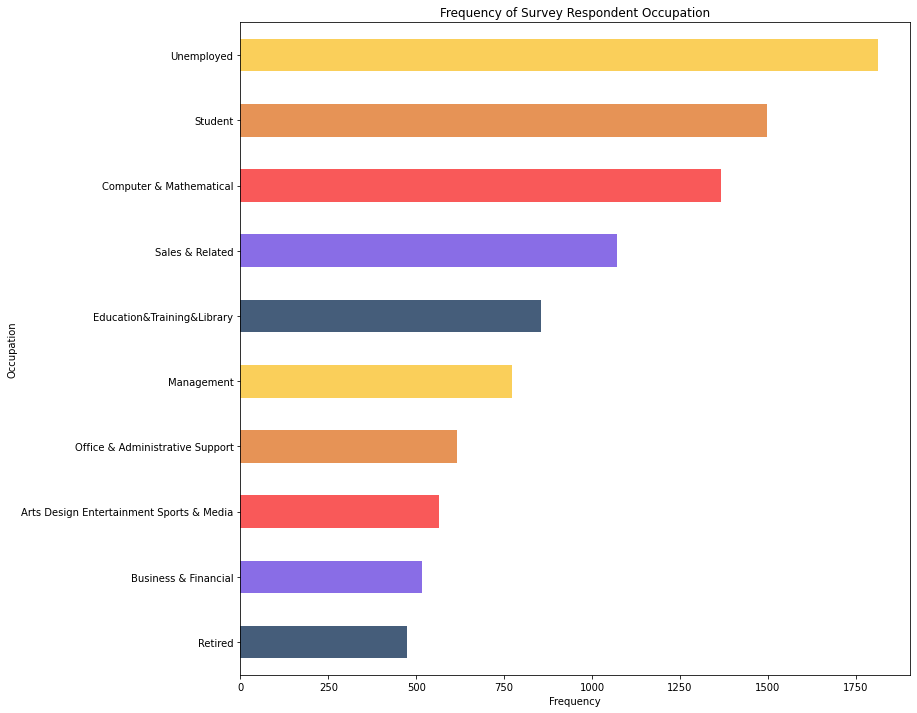

In [21]:
# Find the value counts of each respondent's occupation and plot the 10 most common
survey['occupation'].value_counts().sort_values().tail(10).plot.barh(
    figsize=(12,12), 
    color=["#455D7A","#896DE6","#F95959","#E69356","#FACF5A"])

# Style the plot
plt.title("Frequency of Survey Respondent Occupation")
plt.ylabel("Occupation")
plt.xlabel("Frequency")
plt.show()

### 3.2 Bivariate Exploration
#### 3.2.1 Visits to each type of business

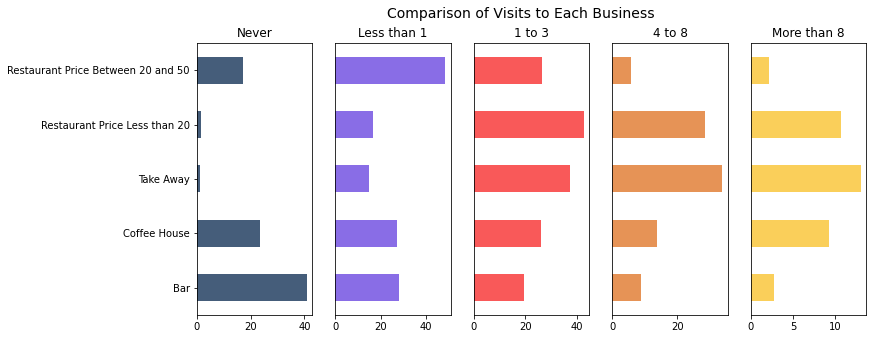

In [22]:
# Get Only the Business Features
businesses = survey.loc[:,['bar', 'coffeeHouse', 'carryAway', 'restaurantLessThan20', 'restaurant20To50']]

# Get the Value Counts for each of the businesses
visit_freq = businesses.apply(pd.Series.value_counts).transpose()

# Convert to Percentrages to make more informative
visit_perc = visit_freq.apply(convert_to_perc)

# Initiate Figure
fig = plt.figure(figsize=(12,5))
ax = fig.subplots(ncols=5)

# Plot each of the visit amounts
visit_perc['never'].plot.barh(ax=ax[0], color="#455D7A")
visit_perc['less1'].plot.barh(ax=ax[1], color="#896DE6")
visit_perc['1~3'].plot.barh(ax=ax[2], color="#F95959")
visit_perc['4~8'].plot.barh(ax=ax[3], color="#E69356")
visit_perc['gt8'].plot.barh(ax=ax[4], color="#FACF5A")

# Update the y tick labels and give titles to each plot
yticklabels = ['Bar', 'Coffee House', 'Take Away', 'Restaurant Price Less than 20', 'Restaurant Price Between 20 and 50']
ax[0].set_yticklabels(yticklabels)
ax[0].set_title("Never")
ax[1].set_yticks([])
ax[1].set_title("Less than 1")
ax[2].set_yticks([])
ax[2].set_title("1 to 3")
ax[3].set_yticks([])
ax[3].set_title("4 to 8")
ax[4].set_yticks([])
ax[4].set_title("More than 8")

# Give figure Title
fig.suptitle("Comparison of Visits to Each Business", fontsize=14)

plt.show()


#### 3.2.2 Coupons accepted per Business Visit Amounts

**Hypothesis:** The more regularaly a person goes to a business the more likely they are to accept a coupon

**Result:** People who go to a business often but not regularly (1-3 times a month) are the most likely to accept a coupon

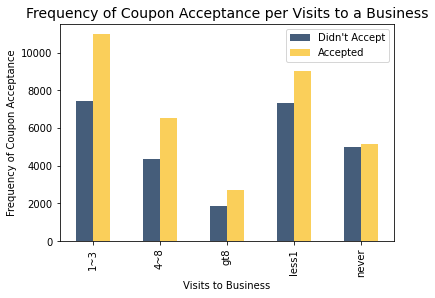

,0,1
1~3,7417,10979
4~8,4382,6548
gt8,1857,2703
less1,7343,9003
never,5011,5152


In [59]:
# Group by y and get value counts 
# Then pivot to visualise better 1/0 comparison per visit amount
businesses = ['bar', 'coffeeHouse', 'carryAway', 'restaurantLessThan20', 'restaurant20To50']

# Get the value counts of each restaurant grouped by whether a coupon was accepted
c_accpt_by_value_counts = survey.groupby(['y']).agg({i:'value_counts' for i in survey.loc[:,businesses]})

# Transform the table to sum the visits for each business
transform_value_counts = c_accpt_by_value_counts.transpose().sum().unstack(level=0)

# Plot the table
transform_value_counts.plot.bar(color=["#455D7A","#FACF5A"])

# Update legend with more understandable text
plt.legend(labels=["Didn't Accept", "Accepted"])
plt.title("Frequency of Coupon Acceptance per Visits to a Business", fontsize=14)
plt.ylabel("Frequency of Coupon Acceptance")
plt.xlabel("Visits to Business")
plt.show()

transform_value_counts

### 3.2.3 Coupons accepted when within 15 minutes to business

**Hypothesis:** When already closer to the businesses people will be more willing to accept a coupon

**Result:** There is a significant larger portion of people accepting a coupon when they were within 15 minutes of the business

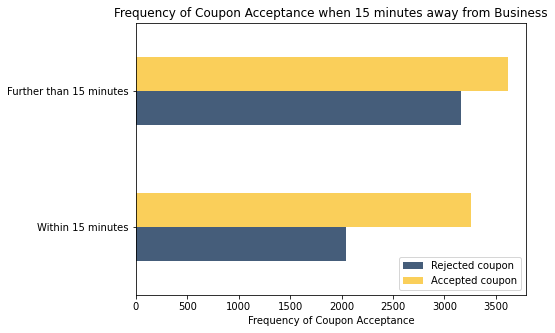

In [24]:
# Plot the Chart
ax = pd.crosstab(survey['toCouponGEQ15min'],survey['y']).plot.barh(color=["#455D7A","#FACF5A"], figsize=(7,5))

# Style the Chart
ax.legend(labels=['Rejected coupon','Accepted coupon'])
ax.set_yticklabels(['Within 15 minutes', 'Further than 15 minutes'])
ax.set_ylabel("")
ax.set_xlabel("Frequency of Coupon Acceptance")
ax.set_title("Frequency of Coupon Acceptance when 15 minutes away from Business")
plt.show()

#### 3.2.4 Comparing Education and Income

**Hypothesis:** People with higher education levels will have higher income

**Result:** There certainly appears to be a correlation between higher income and higher education

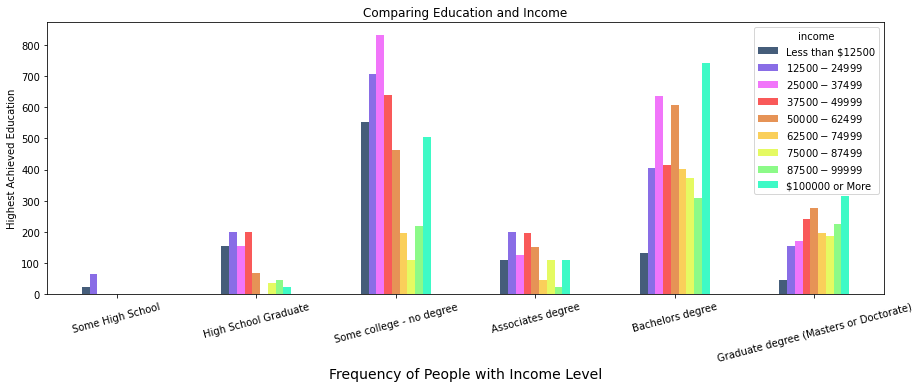

In [25]:
# Plot the Chart
pd.crosstab(survey['income'],survey['education']).transpose().plot.bar(
    figsize=(15,5), 
    color=["#455D7A", "#896DE6", "#F175FA", "#F95959","#E69356", "#FACF5A", "#E5FA62", "#8CFA88", "#3EFAC6"],
    rot = 15)

# Style the Chart
plt.title("Comparing Education and Income")
plt.ylabel("Highest Achieved Education")
plt.xlabel("Frequency of People with Income Level", size=14)
plt.show()

#### 3.2.5 Comparing Income and Coupon Acceptance

Hypothesis: People with lower income will be more accepting of the coupon

Result: People with lower income or extremely high incomes are more willing to accept a coupon

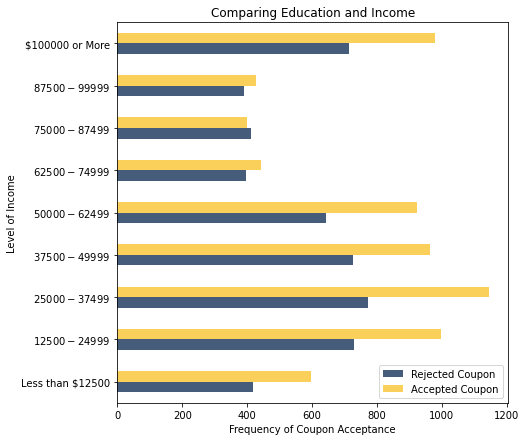

In [26]:
# Plot the Chart
pd.crosstab(survey['income'],survey['y']).plot.barh(figsize=(7,7), color=["#455D7A","#FACF5A"])

# Style the chart
plt.title("Comparing Education and Income")
plt.ylabel("Level of Income")
plt.xlabel("Frequency of Coupon Acceptance")
plt.legend(labels=['Rejected Coupon','Accepted Coupon'])
plt.show()

#### 3.2.6 Comparing Temperature and Coupon Acceptance

Hypothesis: When the weather is *better* (high temp) people will be more willing to accept the coupon

Result: When the temperature is higher people become more willing to accept a coupon

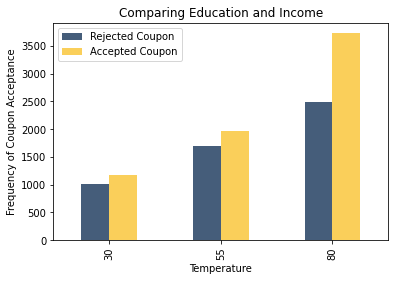

In [27]:
# Plot the Chart
pd.crosstab(survey['temperature'],survey['y']).plot.bar(color=["#455D7A","#FACF5A"])

# Style the chart
plt.title("Comparing Education and Income")
plt.xlabel("Temperature")
plt.ylabel("Frequency of Coupon Acceptance")
plt.legend(labels=['Rejected Coupon','Accepted Coupon'])
plt.show()

#### 3.2.7 Comparing Time and Coupon Acceptance

**Hypothesis:** People will be more likely to accept a coupon around traditonal *eating* times (breakfast, lunch & dinner)

**Result:** People are more liekly to accept a coupon in the middle of the day

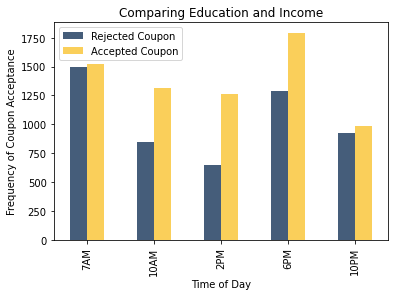

In [28]:
# Plot the Chart
pd.crosstab(survey['time'],survey['y']).plot.bar(color=["#455D7A","#FACF5A"])

# Style the chart
plt.title("Comparing Education and Income")
plt.xlabel("Time of Day")
plt.ylabel("Frequency of Coupon Acceptance")
plt.legend(labels=['Rejected Coupon','Accepted Coupon'])
plt.show()

#### 3.2.8 Education and Coupon Acceptance

**Hypothesis:** People with lower education will be more willing to accept a coupon

**Result:** People who have at least started Tertiary education are more likely to accept coupons. It does appear that the data may be somewhat biased as the two education levels with the most respondants show the most discrepency

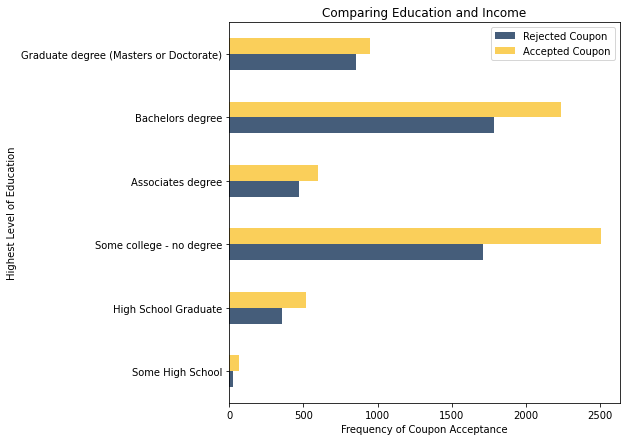

In [29]:
# Plot the Chart
pd.crosstab(survey['education'],survey['y']).plot.barh(figsize=(7,7), color=["#455D7A","#FACF5A"])

# Style the chart
plt.title("Comparing Education and Income")
plt.ylabel("Highest Level of Education")
plt.xlabel("Frequency of Coupon Acceptance")
plt.legend(labels=['Rejected Coupon','Accepted Coupon'])
plt.show()

#### 3.2.9 Do parents accept Coupons more?

**Hypothesis:** Parents will be more likely to accept coupons

**Result:** No, people who weren't parents were less likely to accept a coupon

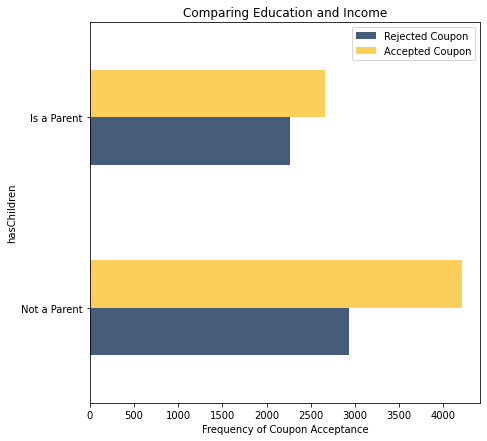

In [30]:
# Plot the Chart
ax = pd.crosstab(survey['hasChildren'],survey['y']).plot.barh(figsize=(7,7), color=["#455D7A","#FACF5A"])

# Style the chart
ax.set_title("Comparing Education and Income")
ax.set_yticklabels(['Not a Parent', 'Is a Parent'])
ax.set_xlabel("Frequency of Coupon Acceptance")
plt.legend(labels=['Rejected Coupon','Accepted Coupon'])
plt.show()

#### 3.2.10 Comparing Expiration and Time of Day

**Hypothesis:** A shorter coupon will be more popular as the day goes on

**Result:** There isn't a particulary strong correlation between expiration and time of day however it's possible to assume people are more willing to accept a longer coupon around breakfast and lunch. 

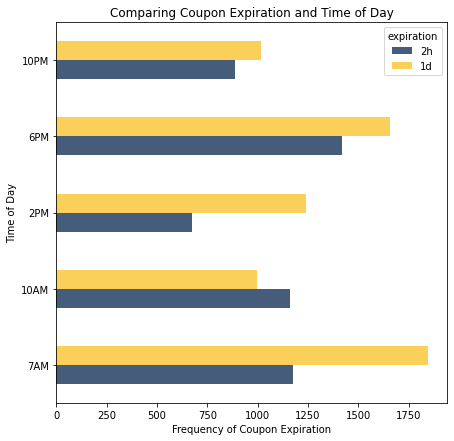

In [31]:
# Plot the Chart
pd.crosstab(survey['expiration'],survey['time']).transpose().plot.barh(figsize=(7,7), color=["#455D7A","#FACF5A"])

# Style the chart
plt.title("Comparing Coupon Expiration and Time of Day")
plt.ylabel("Time of Day")
plt.xlabel("Frequency of Coupon Expiration")
plt.show()

## 4. Data Modelling

### 4.1 Encode the Data

As all the features are categorical and many of them contain textual data they need to be encoded so that the Model can understand the data

In [32]:
# Get Data Values
data = survey.values

# Split Dataset into Features (X) and Target Value (y)
X = data[:, :-1].astype(str)
y = data[:, -1].astype(str)

# Orinal encode input variables
ordinal_encoder = OrdinalEncoder()
X = ordinal_encoder.fit_transform(X)

# Label encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [33]:
# PCA -> Principle Compuputal Analysis
# TSNE
# Dimenionality Techniques

### 4.2 Baseline 

Create a baseline model to compare all later models.
Will also create functions to do each task of building a model to make training further models easier

### 4.2.1 Split the data into the Train & Test sets

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1000)

### 4.2.2 Build the model

In [35]:
knn_clf = KNeighborsClassifier()

### 4.2.3 Fit the Model

In [36]:
knn_fit = knn_clf.fit(x_train, y_train)

Have combined the building and fitting steps into a single function. This function utilises the K-Folds method to ensure the best parameters are used for either the KNN or Decision Tree algorithms. 

In [52]:
# Function to build and fit a model using the K-Folds method. Will return the model built.
def fit_model(model_type, x_train, y_train):
    
    # Build the specified model
    # configure parameters to optimise during K-Folds method
    if model_type == "knn":
        model = KNeighborsClassifier()
        param_grid = {'n_neighbors': range(3,25, 2) }
    
    if model_type == "tree":
        model = DecisionTreeClassifier()
        param_grid = {'max_depth': range(2,10), "max_features": range(12,22), "min_samples_split": range(42,44), "min_samples_leaf": range(47,49) }

    # Searching for the optimal from param_grid
    grid = GridSearchCV(model, param_grid, cv=9, verbose = 1, 
                          n_jobs = -1, scoring='f1_micro')

    # Fit the best k for the model
    grid.fit(x_train, y_train)
    
    return grid

### 4.2.4 Predict on Unseen Data

In [38]:
y_predicted = knn_fit.predict(x_test)

### Evaluate Model
#### Confusion Matrix

In [39]:
# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_predicted)

# Label Confusion Matrix - Make less confusing
df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_predicted
})
# Rename 0 & 1 to more informative text
pd.crosstab(df['actual'], df['predicted']) \
    .rename(columns={0: "Doesn't Want Coupon", 1: "Wants Coupon"},
            index={0: "Doesn't Want Coupon", 1: "Wants Coupon"})

predicted,Doesn't Want Coupon,Wants Coupon
actual,,
Doesn't Want Coupon,836,730
Wants Coupon,592,1466


#### Classification Report

In [40]:
report_knn = classification_report(y_test, y_predicted)
print(report_knn)

              precision    recall  f1-score   support

           0       0.59      0.53      0.56      1566
           1       0.67      0.71      0.69      2058

    accuracy                           0.64      3624
   macro avg       0.63      0.62      0.62      3624
weighted avg       0.63      0.64      0.63      3624



#### F1 Score

In [41]:
print(f1_score(y_test, y_predicted))

0.6892336624353549


### 4.3 Compare Models
Note: each of the models has a key ```train_test_split``` this is a list containing the train test split lists within. The following corresponds to the position in the list each of the splits are:
- 0 = x_train
- 1 = x_test
- 2 = y_train
- 3 = y_test

#### 4.3.1 Initialise Model Dictionary
```score```, ```model```, ```train_test_split``` and ```y_predicted``` are all set to default values.
```type``` defines which algorithm that model will use.
```train_size``` defines what percentage the train test split will be.

In [42]:
models = [
    {"type": "knn", "train_size": 0.5, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []},
    {"type": "knn", "train_size": 0.6, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []},
    {"type": "knn", "train_size": 0.8, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []},
    {"type": "tree", "train_size": 0.5, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []},
    {"type": "tree", "train_size": 0.6, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []},
    {"type": "tree", "train_size": 0.8, "f1_score":0, "model": "", "train_test_split": [], "y_predicted": []}
]

#### 4.3.2 Build and Test the Models

In [53]:
# Loop through each of the models, build them, test them and get the f1 score
for model in models:
    # Create Training Splits
    model['train_test_split'] = x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = model['train_size'], random_state=1000)
    # Fit Models using K-Folds
    model['model'] = fit_model(model['type'], model['train_test_split'][0], model['train_test_split'][2])
    # Get Model Predictions on Test Data
    model['y_predicted'] = model['model'].predict(model['train_test_split'][1])
    # Get F1 Score for each Model
    model['f1_score'] = f1_score(model['train_test_split'][3], model['y_predicted'])

Fitting 9 folds for each of 11 candidates, totalling 99 fits
Fitting 9 folds for each of 11 candidates, totalling 99 fits
Fitting 9 folds for each of 11 candidates, totalling 99 fits
Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Fitting 9 folds for each of 320 candidates, totalling 2880 fits
Fitting 9 folds for each of 320 candidates, totalling 2880 fits


#### 4.3.3 Compare the Models

In [54]:
# Build a DataFrame of the models's results
model_compare = pd.DataFrame(models).drop(columns=['model', 'train_test_split', 'y_predicted'])
model_compare['model_name'] = model_compare.apply(lambda x: x['type'] + "_" + str(x['train_size']), axis=1)
model_compare

,type,train_size,f1_score,model_name
0,knn,0.5,0.697649,knn_0.5
1,knn,0.6,0.697824,knn_0.6
2,knn,0.8,0.704722,knn_0.8
3,tree,0.5,0.741286,tree_0.5
4,tree,0.6,0.753964,tree_0.6
5,tree,0.8,0.754768,tree_0.8


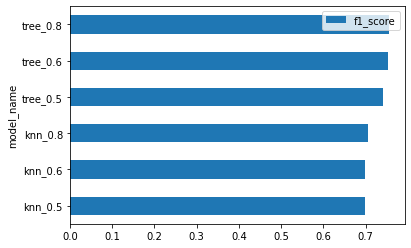

In [55]:
# Plot the Results on a Bar Graph
model_compare.plot.barh('model_name', 'f1_score')
plt.show()

In [58]:
# Best tree's parameters
print(models[4]['model'].best_params_)

# Re-create model of the best performing tree with exact parameters
export_model = DecisionTreeClassifier(max_depth=9, max_features=19, min_samples_split=47, min_samples_leaf=42)
export_fit = export_model.fit(models[5]['train_test_split'][0], models[5]['train_test_split'][2])

# Create a graphical export of the tree
with open("best_tree.dot","w") as f:
    f = export_graphviz(export_fit, 
                        out_file=f,
                        feature_names=survey.drop('y', axis=1).columns, 
                        class_names=["1","0"],
                        filled=True,
                        rounded=True, 
                        special_characters=True)

{'max_depth': 9, 'max_features': 19, 'min_samples_leaf': 47, 'min_samples_split': 42}
